In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Take cleaned and selected dummy variables and combine them with the class feature from the full set
data = pd.read_csv('cleaned_dummy_dataset.csv')
data_full = pd.read_csv('soybean_csv.csv')
data['Class'] = data_full['class']
#data.drop('Unnamed: 0', inplace=True)
data = data.loc[:,'plant-growth_abnorm':]
data.tail()

,plant-growth_abnorm,leafspots-halo_no-yellow-halos,leafspots-marg_w-s-marg,leafspot-size_gt-1/8,leaf-mild_absent,stem-cankers_absent,canker-lesion_dk-brown-blk,fruiting-bodies_absent,fruiting-bodies_present,external-decay_absent,int-discolor_brown,int-discolor_none,fruit-pods_diseased,fruit-pods_norm,fruit-spots_absent,fruit-spots_colored,mold-growth_absent,roots_rotted,Class
678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2-4-d-injury
679,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
680,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
681,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
682,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury


In [3]:
# make data numerical and seperate from the class feature
data_num = data.replace({False: 0, True: 1})
data_num = data_num.drop(columns=['Class'])
data_num

,plant-growth_abnorm,leafspots-halo_no-yellow-halos,leafspots-marg_w-s-marg,leafspot-size_gt-1/8,leaf-mild_absent,stem-cankers_absent,canker-lesion_dk-brown-blk,fruiting-bodies_absent,fruiting-bodies_present,external-decay_absent,int-discolor_brown,int-discolor_none,fruit-pods_diseased,fruit-pods_norm,fruit-spots_absent,fruit-spots_colored,mold-growth_absent,roots_rotted
0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
679,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
680,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
681,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
# do PCA on the dummy variables without any heed 
# for those who told me it makes no sense and shouldn't work
pca = PCA(n_components=5)
pcf = pca.fit(data_num)
pcs = pca.transform(data_num)
np.cumsum(pca.explained_variance_ratio_)

array([0.40318535, 0.58803121, 0.68053191, 0.75174143, 0.81506721])

In [5]:
# Do a kNN classification on the data, 
# newly made numerical with PCA
y = data['Class']
X = pcs

knn_2_pca = KNeighborsClassifier(n_neighbors=2).fit(X,y).score(X,y)
knn_3_pca = KNeighborsClassifier(n_neighbors=3).fit(X,y).score(X,y)
knn_6_pca = KNeighborsClassifier(n_neighbors=6).fit(X,y).score(X,y)
knn_9_pca = KNeighborsClassifier(n_neighbors=9).fit(X,y).score(X,y)

In [6]:
# LOL IT WORKS HUGE L FOR THE DOUBTERS
print(f'PCA\n---\nk=2: {knn_2_pca},\nk=3: {knn_3_pca},\nk=6: {knn_6_pca},\nk=9: {knn_9_pca}')

PCA
---
k=2: 0.8594436310395315,
k=3: 0.787701317715959,
k=6: 0.7789165446559297,
k=9: 0.7554904831625183


In [7]:
scores = []
for i in range(10):
    score_row = []
    for j in range(10):
        pcs_i = PCA(n_components=i+1).fit_transform(data_num)
        knn_j_i = KNeighborsClassifier(n_neighbors=j+1).fit(pcs_i,y).score(pcs_i,y)
        score_row.append(knn_j_i)
    scores.append(score_row)

In [8]:
np.max(scores)

0.862371888726208

In [10]:
print(f'Optimal classification success rate: {np.max(scores):.3%}')
print(f'# of PCA components: {np.argmax(np.max(scores, axis=1)) + 1}')
print(f'k: {np.argmax(np.max(scores[np.argmax(np.max(scores, axis=1))]))+1}')

Optimal classification success rate: 86.237%
# of PCA components: 3
k: 1


Text(0.5, 0, 'k')

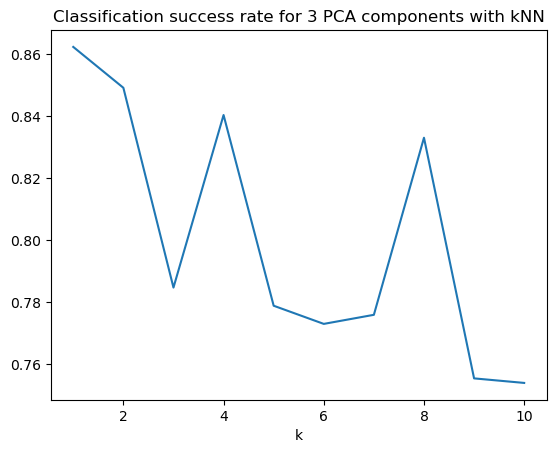

In [15]:
sns.lineplot(x=np.arange(1,11),y=scores[2])
plt.title('Classification success rate for 3 PCA components with kNN')
plt.xlabel('k')

Text(0.5, 0, 'k')

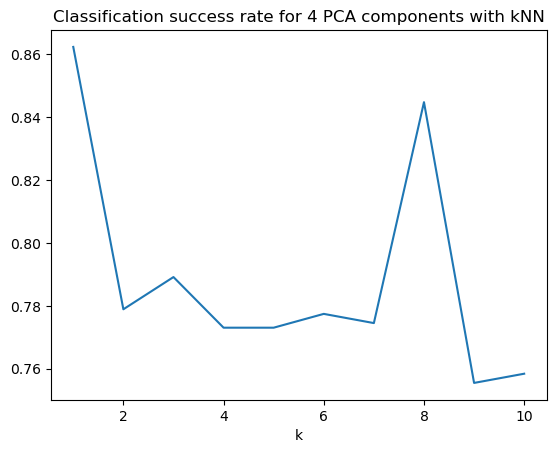

In [16]:
sns.lineplot(x=np.arange(1,11),y=scores[3])
plt.title('Classification success rate for 4 PCA components with kNN')
plt.xlabel('k')

Text(0.5, 0, 'k')

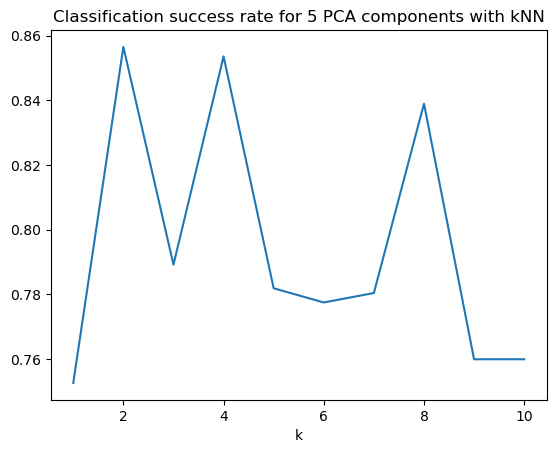

In [17]:
sns.lineplot(x=np.arange(1,11),y=scores[5])
plt.title('Classification success rate for 5 PCA components with kNN')
plt.xlabel('k')